In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import tensorflow as tf

from keras.applications.vgg16 import VGG16

Using TensorFlow backend.


In [2]:
import scipy.io as sio
train_data = sio.loadmat('../input/svhndataset/train_32x32.mat')
test_data = sio.loadmat('../input/svhndataset/test_32x32.mat')

X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']

classes = [0,1,2,3,4,5,6,7,8,9]
num_classes = 10
no_classes=11


In [3]:
X_train = np.transpose(X_train,(3,0,1,2))
X_test = np.transpose(X_test,(3,0,1,2))

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [4]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
#Resnet50 Model
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
model = Sequential()
model.add(ResNet50(include_top=True, pooling='avg', weights=None,input_shape=X_train[0].shape, classes=no_classes))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',      
              metrics=['acc'])

In [10]:
#VGG16 model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(VGG16(include_top=True, weights=None, input_shape=X_train[0].shape, pooling='max', classes=no_classes))

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['acc'])

In [5]:
#VGG19 model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from keras.applications.vgg19 import VGG19
model = Sequential()
model.add(VGG19(include_top=True, weights=None, input_shape=X_train[0].shape, pooling='max', classes=no_classes))


model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',      
              metrics=['acc'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 11)                38952011  
Total params: 38,952,011
Trainable params: 38,952,011
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_history = model.fit(X_train, y_train, batch_size=500, epochs=3, validation_split = 0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/3
58605/58605 [==============================] - 3675s 63ms/step - loss: 2.2552 - acc: 0.1887 - val_loss: 2.2588 - val_acc: 0.1875
Epoch 2/3
58605/58605 [==============================] - 3692s 63ms/step - loss: 2.2410 - acc: 0.1889 - val_loss: 2.2434 - val_acc: 0.1875
Epoch 3/3
58605/58605 [==============================] - 3727s 64ms/step - loss: 2.2401 - acc: 0.1896 - val_loss: 2.2441 - val_acc: 0.1875


/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


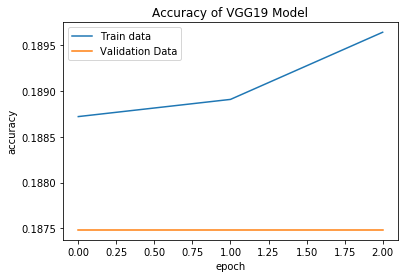

In [8]:
plt.plot(model_history.history["acc"])
plt.plot(model_history.history['val_acc'])
plt.title('Accuracy of VGG19 Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train data', 'Validation Data'], loc='bottom right')
plt.show()

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 2.227403603233145
Test accuracy: 0.19587430357933044
